# Linear Regression Assignment

## BoomBikes

## Step 1 : Reading the Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
bikes_df = pd.read_csv("day.csv")

# Reindexing the dataframe

bikes_df = bikes_df.set_index("instant")


In [3]:
bikes_df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        01-01-2018       1   0     1        0        1           1   
2        02-01-2018       1   0     1        0        2           1   
3        03-01-2018       1   0     1        0        3           1   
4        04-01-2018       1   0     1        0        4           1   
5        05-01-2018       1   0     1        0        5           1   

         weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                
1                 2  14.110847  18.18125  80.5833  10.749882     331   
2                 2  14.902598  17.68695  69.6087  16.652113     131   
3                 1   8.050924   9.47025  43.7273  16.636703     120   
4                 1   8.200000  10.60610  59.0435  10.739832     108   
5                 1   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

In [4]:
# Shape of the dataset
bikes_df.shape

(730, 15)

In [5]:
# Info of the dataset
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


All the values in the dataset seems to be non-null 

In [6]:
# Percentage of notnull values in each column
percent_non_null = (bikes_df.notnull().mean() * 100).round(2)
print(percent_non_null)

dteday        100.0
season        100.0
yr            100.0
mnth          100.0
holiday       100.0
weekday       100.0
workingday    100.0
weathersit    100.0
temp          100.0
atemp         100.0
hum           100.0
windspeed     100.0
casual        100.0
registered    100.0
cnt           100.0
dtype: float64


In [7]:
# Descriptive statistics of the dataset
bikes_df.describe()



season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.995890    0.690411   
std      1.110184    0.500343    3.450215    0.167266    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data Cleaning


In [8]:
bikes_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [9]:
bikes_df[["temp","atemp"]].head()

temp     atemp
instant                     
1        14.110847  18.18125
2        14.902598  17.68695
3         8.050924   9.47025
4         8.200000  10.60610
5         9.305237  11.46350

both temp and atemp have same values, so we need to check if they have same distribution




Text(0, 0.5, 'Frequency')

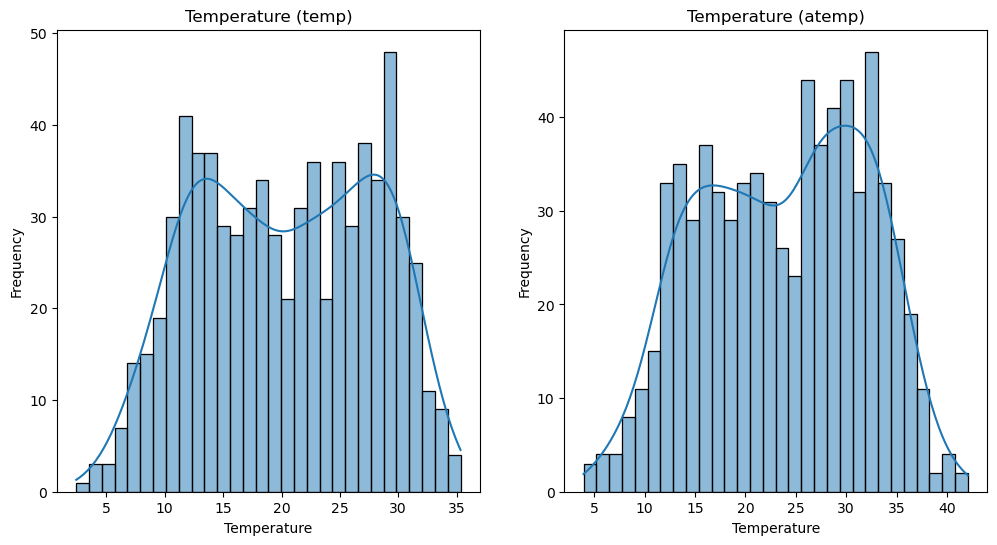

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bikes_df['temp'], bins=30, kde=True)
plt.title('Temperature (temp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(bikes_df['atemp'], bins=30, kde=True)
plt.title('Temperature (atemp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')



In [11]:
# Finding the correlation between temp and atemp
bikes_df[["temp","atemp"]].corr()



temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000

It makes sense that temp and atemp are highly correlated, as they both measure temperature.


In [12]:
# Dropping atemp
bikes_df.drop(columns=["atemp"], inplace=True)

In [13]:
bikes_df[["casual","registered", "cnt"]].head()



casual  registered   cnt
instant                          
1           331         654   985
2           131         670   801
3           120        1229  1349
4           108        1454  1562
5            82        1518  1600

In [14]:
# Since the sum of casual and registered is equal to cnt, we can drop casual and registered
bikes_df.drop(columns=["casual","registered"], inplace=True)


In [15]:
bikes_df.head(10)

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        01-01-2018       1   0     1        0        1           1   
2        02-01-2018       1   0     1        0        2           1   
3        03-01-2018       1   0     1        0        3           1   
4        04-01-2018       1   0     1        0        4           1   
5        05-01-2018       1   0     1        0        5           1   
6        06-01-2018       1   0     1        0        6           0   
7        07-01-2018       1   0     1        0        0           0   
8        08-01-2018       1   0     1        0        1           1   
9        09-01-2018       1   0     1        0        2           1   
10       10-01-2018       1   0     1        0        3           1   

         weathersit       temp      hum  windspeed   cnt  
instant                                                   
1                 2  14.110847  80.5833  10.749882   985  
2                 2  14.902598  69.6087  16.652113   801  
3                 1   8.050924  43.7273  16.636703  1349  
4                 1   8.200000  59.0435  10.739832  1562  
5                 1   9.305237  43.6957  12.522300  1600  
6                 1   8.378268  51.8261   6.000868  1606  
7                 2   8.057402  49.8696  11.304642  1510  
8                 2   6.765000  53.5833  17.875868   959  
9                 1   5.671653  43.4167  24.250650   822  
10                1   6.184153  48.2917  14.958889  1321

In [16]:
# Extract the day out from dteday
bikes_df["day"] = pd.to_datetime(bikes_df["dteday"], format="%d-%m-%Y").dt.day
bikes_df.head(10)

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                               
1        01-01-2018       1   0     1        0        1           1   
2        02-01-2018       1   0     1        0        2           1   
3        03-01-2018       1   0     1        0        3           1   
4        04-01-2018       1   0     1        0        4           1   
5        05-01-2018       1   0     1        0        5           1   
6        06-01-2018       1   0     1        0        6           0   
7        07-01-2018       1   0     1        0        0           0   
8        08-01-2018       1   0     1        0        1           1   
9        09-01-2018       1   0     1        0        2           1   
10       10-01-2018       1   0     1        0        3           1   

         weathersit       temp      hum  windspeed   cnt  day  
instant                                                        
1                 2  14.110847  80.5833  10.749882   985    1  
2                 2  14.902598  69.6087  16.652113   801    2  
3                 1   8.050924  43.7273  16.636703  1349    3  
4                 1   8.200000  59.0435  10.739832  1562    4  
5                 1   9.305237  43.6957  12.522300  1600    5  
6                 1   8.378268  51.8261   6.000868  1606    6  
7                 2   8.057402  49.8696  11.304642  1510    7  
8                 2   6.765000  53.5833  17.875868   959    8  
9                 1   5.671653  43.4167  24.250650   822    9  
10                1   6.184153  48.2917  14.958889  1321   10

In [17]:
# Dropping dteday as now the day, month and year are already present
bikes_df.drop(columns=["dteday"], inplace=True)
bikes_df.head(10)

season  yr  mnth  holiday  weekday  workingday  weathersit  \
instant                                                               
1             1   0     1        0        1           1           2   
2             1   0     1        0        2           1           2   
3             1   0     1        0        3           1           1   
4             1   0     1        0        4           1           1   
5             1   0     1        0        5           1           1   
6             1   0     1        0        6           0           1   
7             1   0     1        0        0           0           2   
8             1   0     1        0        1           1           2   
9             1   0     1        0        2           1           1   
10            1   0     1        0        3           1           1   

              temp      hum  windspeed   cnt  day  
instant                                            
1        14.110847  80.5833  10.749882   985    1  
2        14.902598  69.6087  16.652113   801    2  
3         8.050924  43.7273  16.636703  1349    3  
4         8.200000  59.0435  10.739832  1562    4  
5         9.305237  43.6957  12.522300  1600    5  
6         8.378268  51.8261   6.000868  1606    6  
7         8.057402  49.8696  11.304642  1510    7  
8         6.765000  53.5833  17.875868   959    8  
9         5.671653  43.4167  24.250650   822    9  
10        6.184153  48.2917  14.958889  1321   10

In [18]:
# Converting the season to its string type
# season (1:spring, 2:summer, 3:fall, 4:winter)
bikes_df["season"] = bikes_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikes_df["season"].value_counts()


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [19]:
# Similarly converting mnth to its string type
# mnth (1:January, 2:February, 3:March, 4:April, 5:May, 6:June, 7:July, 8:August, 9:September, 10:October, 11:November, 12:December)
bikes_df["mnth"] = bikes_df["mnth"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
bikes_df["mnth"].value_counts()


mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [20]:
# Similarly for weekday
# weekday (0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat)
bikes_df["weekday"] = bikes_df["weekday"].map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})
bikes_df["weekday"].value_counts()



weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [21]:
# Similarly for weathersit
# weathersit (1:Clear, 2:Mist, 3:Light Snow, 4:Heavy Rain)
bikes_df["weathersit"] = bikes_df["weathersit"].map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"})
bikes_df["weathersit"].value_counts()


weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [22]:
# Value counts for yr
print(bikes_df["yr"].value_counts())
print("-"*100)
# Value counts for workingday
print(bikes_df["workingday"].value_counts())
print("-"*100)
# Value counts for holiday
print(bikes_df["holiday"].value_counts())
print("-"*100)



yr
0    365
1    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
workingday
1    504
0    226
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
holiday
0    709
1     21
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


## Step 2 : Visualizing the data


In [23]:
# Checking the columns once again
bikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [24]:
# Creating new datafram with numerical variables
num_df = bikes_df[["temp", "hum", "windspeed", "cnt"]]
num_df.head(10) 

temp      hum  windspeed   cnt
instant                                     
1        14.110847  80.5833  10.749882   985
2        14.902598  69.6087  16.652113   801
3         8.050924  43.7273  16.636703  1349
4         8.200000  59.0435  10.739832  1562
5         9.305237  43.6957  12.522300  1600
6         8.378268  51.8261   6.000868  1606
7         8.057402  49.8696  11.304642  1510
8         6.765000  53.5833  17.875868   959
9         5.671653  43.4167  24.250650   822
10        6.184153  48.2917  14.958889  1321

In [25]:
# Pairplot for the numerical data
sns.pairplot(num_df)


- There seems to be a correlation between "temp" and "cnt"
- "hum" and "windspeed" also seems to have some collinearity
- similarily we can see correlation between "temp" and "hum"

In [26]:
# Heatmap for Numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()



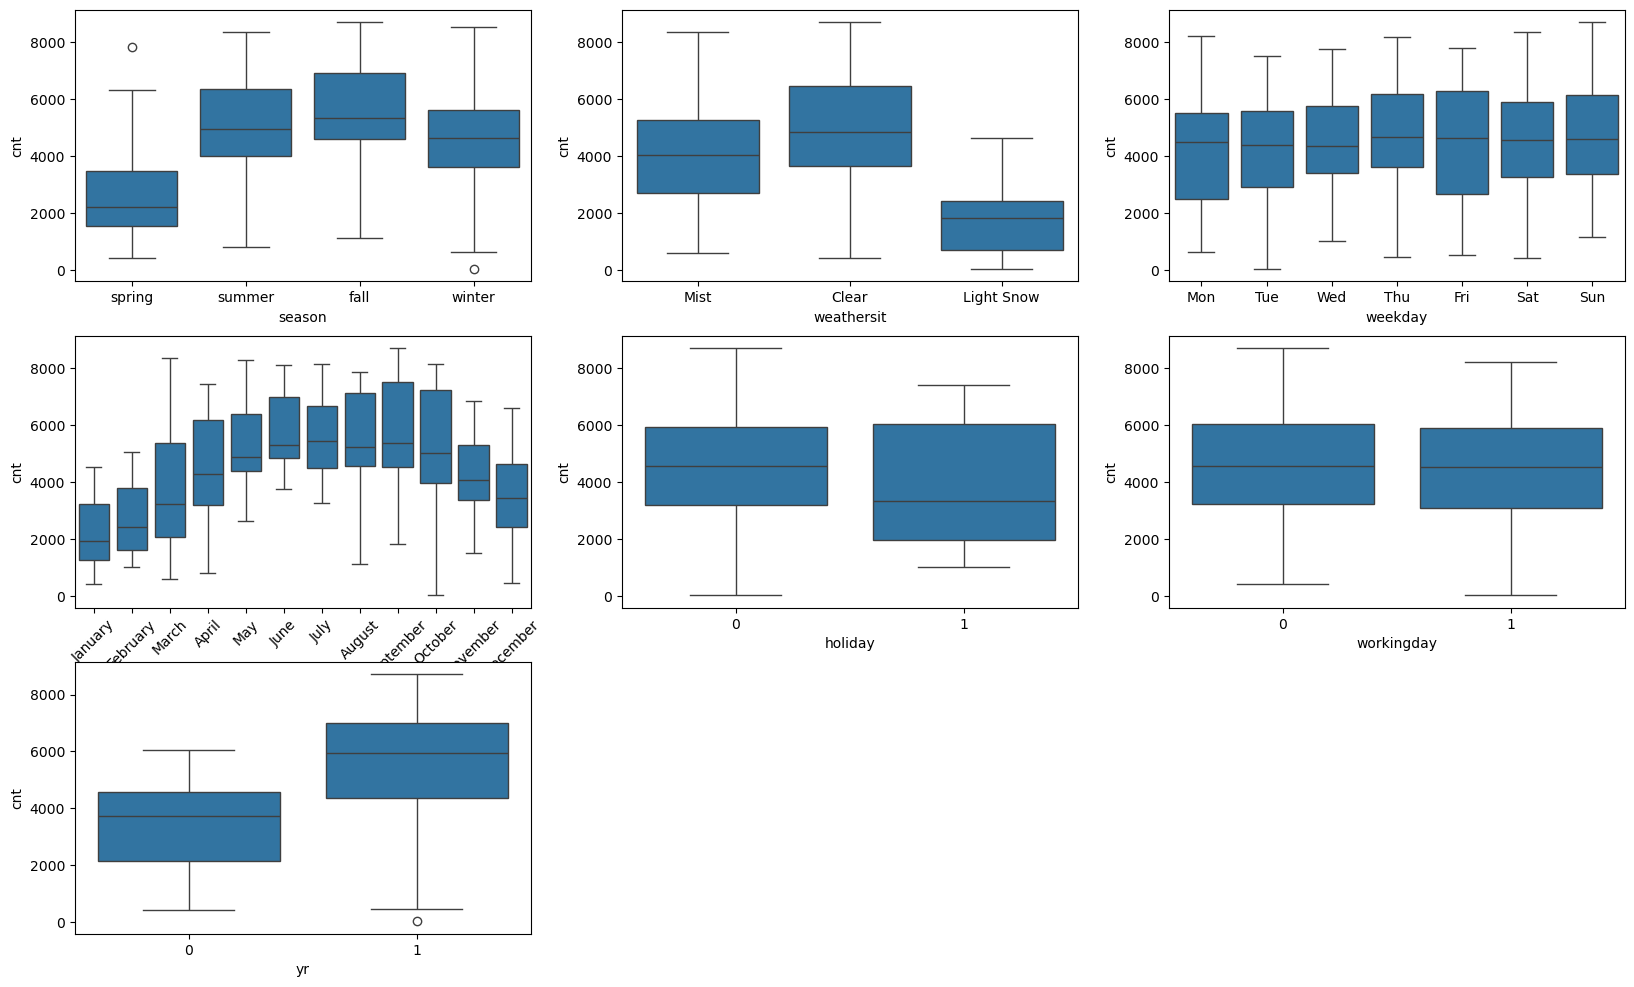

In [27]:
# Plotting boxplots for categorical variables.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.subplot(3,3,4)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=bikes_df)
plt.show()

- **Season:** Fall is the busiest season for bike rentals, while spring is the slowest. Summer and winter have moderate rental numbers.
- **Weather:** Clear weather brings the most rentals, while light snow brings the fewest.
- **Weekday:** All weekdays have similar rental numbers.
- **Month:** June, July, August, and September are the busiest months, while January and February are the slowest.
- **Holiday:** Non-holiday days have more rentals than holidays.
- **Working Day:** Working days and non-working days have similar rental numbers.
- **Year:** Rentals were significantly higher in 2019 compared to 2018.

## Step 3: Data Preparation 


In [28]:
# Creating a dataframe containing variables for which dummy variables needs to be created.
CategoricalVars = bikes_df[['season', 'mnth', 'weathersit', 'weekday']]
CategoricalVars.head()

season     mnth weathersit weekday
instant                                    
1        spring  January       Mist     Mon
2        spring  January       Mist     Tue
3        spring  January      Clear     Wed
4        spring  January      Clear     Thu
5        spring  January      Clear     Fri

In [29]:
# Creating dummy variables
bike_dummies_df = pd.get_dummies(CategoricalVars, drop_first=True).astype(int)
bike_dummies_df.head()

season_spring  season_summer  season_winter  mnth_August  \
instant                                                             
1                    1              0              0            0   
2                    1              0              0            0   
3                    1              0              0            0   
4                    1              0              0            0   
5                    1              0              0            0   

         mnth_December  mnth_February  mnth_January  mnth_July  mnth_June  \
instant                                                                     
1                    0              0             1          0          0   
2                    0              0             1          0          0   
3                    0              0             1          0          0   
4                    0              0             1          0          0   
5                    0              0             1          0          0   

         mnth_March  ...  mnth_October  mnth_September  weathersit_Light Snow  \
instant              ...                                                        
1                 0  ...             0               0                      0   
2                 0  ...             0               0                      0   
3                 0  ...             0               0                      0   
4                 0  ...             0               0                      0   
5                 0  ...             0               0                      0   

         weathersit_Mist  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
instant                                                                        
1                      1            1            0            0            0   
2                      1            0            0            0            0   
3                      0            0            0            0            0   
4                      0            0            0            0            1   
5                      0            0            0            0            0   

         weekday_Tue  weekday_Wed  
instant                            
1                  0            0  
2                  1            0  
3                  0            1  
4                  0            0  
5                  0            0  

[5 rows x 22 columns]

In [30]:
# Dropping the categorical variables from the original dataframe and re-adding the dummy variables
columns_to_drop = CategoricalVars.columns.tolist()
bikes_df = bikes_df.drop(columns_to_drop, axis=1)  # {{ edit_1 }}
bikes_df = pd.concat([bikes_df, bike_dummies_df], axis=1)
bikes_df.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  day  \
instant                                                                      
1         0        0           1  14.110847  80.5833  10.749882   985    1   
2         0        0           1  14.902598  69.6087  16.652113   801    2   
3         0        0           1   8.050924  43.7273  16.636703  1349    3   
4         0        0           1   8.200000  59.0435  10.739832  1562    4   
5         0        0           1   9.305237  43.6957  12.522300  1600    5   

         season_spring  season_summer  ...  mnth_October  mnth_September  \
instant                                ...                                 
1                    1              0  ...             0               0   
2                    1              0  ...             0               0   
3                    1              0  ...             0               0   
4                    1              0  ...             0               0   
5                    1              0  ...             0               0   

         weathersit_Light Snow  weathersit_Mist  weekday_Mon  weekday_Sat  \
instant                                                                     
1                            0                1            1            0   
2                            0                1            0            0   
3                            0                0            0            0   
4                            0                0            0            0   
5                            0                0            0            0   

         weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  
instant                                                      
1                  0            0            0            0  
2                  0            0            1            0  
3                  0            0            0            1  
4                  0            1            0            0  
5                  0            0            0            0  

[5 rows x 30 columns]

## Step4: Splitting the Data into Training and Testing Sets

In [31]:
# Importing the libraries for train-test split
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test = train_test_split(bikes_df, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
print(f"Training Set Shape: {df_train.shape}")
print("-"*25)
print(f"Testing Set Shape: {df_test.shape}")

Training Set Shape: (510, 30)
-------------------------
Testing Set Shape: (219, 30)


### 4.1 Rescaling the Features

In [34]:
# Importing "MinMaxScaler" from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Applying 'scaler()' to all the columns except the 'yes-no'/'1-0' and 'dummy' variables.
columns_to_scale = list(bikes_df.columns)+["day"]
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
instant                                                                      
654      1.0      0.0         1.0  0.509887  0.575354   0.300794  0.864243   
577      1.0      0.0         1.0  0.815169  0.725633   0.264686  0.827658   
427      1.0      0.0         0.0  0.442393  0.640189   0.255342  0.465255   
729      1.0      0.0         1.0  0.245101  0.498067   0.663106  0.204096   
483      1.0      0.0         0.0  0.395666  0.504508   0.188475  0.482973   

              day  season_spring  season_summer  ...  mnth_October  \
instant                                          ...                 
654      0.500000            0.0            0.0  ...           1.0   
577      1.000000            0.0            0.0  ...           0.0   
427      0.066667            1.0            0.0  ...           0.0   
729      0.966667            1.0            0.0  ...           0.0   
483      0.900000            0.0            1.0  ...           0.0   

         mnth_September  weathersit_Light Snow  weathersit_Mist  weekday_Mon  \
instant                                                                        
654                 0.0                    0.0              0.0          0.0   
577                 0.0                    0.0              0.0          0.0   
427                 0.0                    0.0              1.0          0.0   
729                 0.0                    0.0              0.0          1.0   
483                 0.0                    0.0              1.0          0.0   

         weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  
instant                                                                   
654              0.0          0.0          0.0          0.0          1.0  
577              0.0          0.0          0.0          0.0          1.0  
427              0.0          1.0          0.0          0.0          0.0  
729              0.0          0.0          0.0          0.0          0.0  
483              0.0          1.0          0.0          0.0          0.0  

[5 rows x 30 columns]

In [36]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         day  season_spring  season_summer  ...  \
count  510.000000  510.000000     510.000000     510.000000  ...   
mean     0.513620    0.487124       0.243137       0.245098  ...   
std      0.224593    0.296648       0.429398       0.430568  ...   
min      0.000000    0.000000       0.000000       0.000000  ...   
25%      0.356420    0.233333       0.000000       0.000000  ...   
50%      0.518638    0.500000       0.000000       0.000000  ...   
75%      0.684710    0.733333       0.000000       0.000000  ...   
max      1.000000    1.000000       1.000000       1.000000  ...   

       mnth_October  mnth_September  weathersit_Light Snow  weathersit_Mist  \
count    510.000000      510.000000             510.000000       510.000000   
mean       0.086275        0.080392               0.029412         0.343137   
std        0.281045        0.272166               0.169124         0.475223   
min        0.000000        0.000000               0.000000         0.000000   
25%        0.000000        0.000000               0.000000         0.000000   
50%        0.000000        0.000000               0.000000         0.000000   
75%        0.000000        0.000000               0.000000         1.000000   
max        1.000000        1.000000               1.000000         1.000000   

       weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.154902     0.129412     0.137255     0.143137     0.152941   
std       0.362166     0.335985     0.344454     0.350557     0.360284   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Wed  
count   510.000000  
mean      0.135294  
std       0.342373  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 30 columns]

In [37]:
# Checking the correlation in df_train
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(),1), annot=True, cmap='coolwarm', linewidths=.5)

<Axes: >

No variables seems to be highly correlated

### 4.2 Dividing the train into X and y sets for model building

In [38]:
# Dividing the data into dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
y_train.head()

instant
654    0.864243
577    0.827658
427    0.465255
729    0.204096
483    0.482973
Name: cnt, dtype: float64

In [40]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed       day  \
instant                                                                      
654      1.0      0.0         1.0  0.509887  0.575354   0.300794  0.500000   
577      1.0      0.0         1.0  0.815169  0.725633   0.264686  1.000000   
427      1.0      0.0         0.0  0.442393  0.640189   0.255342  0.066667   
729      1.0      0.0         1.0  0.245101  0.498067   0.663106  0.966667   
483      1.0      0.0         0.0  0.395666  0.504508   0.188475  0.900000   

         season_spring  season_summer  season_winter  ...  mnth_October  \
instant                                               ...                 
654                0.0            0.0            1.0  ...           1.0   
577                0.0            0.0            0.0  ...           0.0   
427                1.0            0.0            0.0  ...           0.0   
729                1.0            0.0            0.0  ...           0.0   
483                0.0            1.0            0.0  ...           0.0   

         mnth_September  weathersit_Light Snow  weathersit_Mist  weekday_Mon  \
instant                                                                        
654                 0.0                    0.0              0.0          0.0   
577                 0.0                    0.0              0.0          0.0   
427                 0.0                    0.0              1.0          0.0   
729                 0.0                    0.0              0.0          1.0   
483                 0.0                    0.0              1.0          0.0   

         weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  
instant                                                                   
654              0.0          0.0          0.0          0.0          1.0  
577              0.0          0.0          0.0          0.0          1.0  
427              0.0          1.0          0.0          0.0          0.0  
729              0.0          0.0          0.0          0.0          0.0  
483              0.0          1.0          0.0          0.0          0.0  

[5 rows x 29 columns]

## Step 5: Building a linear Model

### 5.1 RFE (Recursive Feature Elimination)

In [41]:
# Importing "RFE" and "LinearRegression" from sklearn library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)                 # running RFE
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
# Let's take a look at which features were selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 13),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', False, 15),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10)]

In [44]:
# Selecting the columns with rank 1.
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [45]:
# Creating the X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_cols]
X_train_rfe.head()

yr  holiday      temp       hum  windspeed  season_spring  \
instant                                                               
654      1.0      0.0  0.509887  0.575354   0.300794            0.0   
577      1.0      0.0  0.815169  0.725633   0.264686            0.0   
427      1.0      0.0  0.442393  0.640189   0.255342            1.0   
729      1.0      0.0  0.245101  0.498067   0.663106            1.0   
483      1.0      0.0  0.395666  0.504508   0.188475            0.0   

         season_summer  season_winter  mnth_December  mnth_January  mnth_July  \
instant                                                                         
654                0.0            1.0            0.0           0.0        0.0   
577                0.0            0.0            0.0           0.0        1.0   
427                0.0            0.0            0.0           0.0        0.0   
729                0.0            0.0            1.0           0.0        0.0   
483                1.0            0.0            0.0           0.0        0.0   

         mnth_November  mnth_September  weathersit_Light Snow  weathersit_Mist  
instant                                                                         
654                0.0             0.0                    0.0              0.0  
577                0.0             0.0                    0.0              0.0  
427                0.0             0.0                    0.0              1.0  
729                0.0             0.0                    0.0              0.0  
483                0.0             0.0                    0.0              1.0

### 5.2 Calculating VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif = vif.reset_index(drop=True)
    return(vif)

### 5.3 Building model using statsmodel

In [47]:
# importing "statsmodel"
import statsmodels.api as sm


In [48]:
X_train_rfe = sm.add_constant(X_train_rfe)
# Adding the constant variable to test

### 5.3.1 First Model


In [49]:
lr_model = sm.OLS(y_train, X_train_rfe).fit()

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        09:35:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist          -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# VIF calculation
calc_vif(X_train_rfe)

variables    VIF
0                   const  82.48
1           season_spring   5.27
2                    temp   4.42
3           season_winter   3.83
4           season_summer   2.76
5                     hum   1.93
6           mnth_November   1.76
7            mnth_January   1.68
8         weathersit_Mist   1.57
9           mnth_December   1.49
10              mnth_July   1.49
11         mnth_September   1.34
12  weathersit_Light Snow   1.26
13              windspeed   1.21
14                     yr   1.04
15                holiday   1.03


Based on the model results, we observe:
- All features exhibit p-values below 0.05, indicating statistical significance.
- However, the 'season_spring' feature has a Variance Inflation Factor (VIF) of 5.27. Generally, features with VIF values exceeding 5 are candidates for removal due to potential multicollinearity.

### 5.3.3 Third Model

In [52]:
X_train_rfe = X_train_rfe.drop(["season_spring"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model_3 = sm.OLS(y_train, X_train_rfe).fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          1.54e-188
Time:                        09:35:54   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2563      0.029      8.912      0.000       0.200       0.313
yr                        0.2289      0.008     28.178      0.000       0.213       0.245
holiday                  -0.0947      0.026     -3.680      0.000      -0.145      -0.044
temp                      0.5540      0.027     20.510      0.000       0.501       0.607
hum                      -0.1723      0.038     -4.553      0.000      -0.247      -0.098
windspeed                -0.1969      0.026     -7.633      0.000      -0.248      -0.146
season_summer             0.0716      0.011      6.423      0.000       0.050       0.094
season_winter             0.1387      0.013     10.412      0.000       0.113       0.165
mnth_December            -0.0312      0.017     -1.786      0.075      -0.066       0.003
mnth_January             -0.0476      0.018     -2.613      0.009      -0.083      -0.012
mnth_July                -0.0454      0.018     -2.520      0.012      -0.081      -0.010
mnth_November            -0.0310      0.019     -1.674      0.095      -0.067       0.005
mnth_September            0.0899      0.016      5.549      0.000       0.058       0.122
weathersit_Light Snow    -0.2418      0.026     -9.125      0.000      -0.294      -0.190
weathersit_Mist          -0.0530      0.010     -5.046      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculating VIF
calc_vif(X_train_rfe)

variables    VIF
0                   const  51.75
1                    temp   2.32
2           season_winter   2.08
3                     hum   1.90
4           mnth_November   1.70
5            mnth_January   1.67
6         weathersit_Mist   1.55
7           mnth_December   1.47
8           season_summer   1.44
9               mnth_July   1.43
10  weathersit_Light Snow   1.25
11         mnth_September   1.21
12              windspeed   1.20
13                     yr   1.03
14                holiday   1.03

In this case the VIF of all the variables are less than 5 but the p-value of "mnth_november" is greater than 0.05, so we can try removing that as well

#### 5.3.4 Fourth Model

In [54]:
X_train_rfe = X_train_rfe.drop(["mnth_November"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model_4 = sm.OLS(y_train, X_train_rfe).fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          4.25e-189
Time:                        09:35:55   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2498      0.029      8.751      0.000       0.194       0.306
yr                        0.2290      0.008     28.131      0.000       0.213       0.245
holiday                  -0.0996      0.026     -3.887      0.000      -0.150      -0.049
temp                      0.5621      0.027     21.106      0.000       0.510       0.614
hum                      -0.1718      0.038     -4.530      0.000      -0.246      -0.097
windspeed                -0.1969      0.026     -7.618      0.000      -0.248      -0.146
season_summer             0.0728      0.011      6.530      0.000       0.051       0.095
season_winter             0.1275      0.012     11.062      0.000       0.105       0.150
mnth_December            -0.0201      0.016     -1.241      0.215      -0.052       0.012
mnth_January             -0.0432      0.018     -2.392      0.017      -0.079      -0.008
mnth_July                -0.0464      0.018     -2.572      0.010      -0.082      -0.011
mnth_September            0.0927      0.016      5.745      0.000       0.061       0.124
weathersit_Light Snow    -0.2392      0.026     -9.025      0.000      -0.291      -0.187
weathersit_Mist          -0.0526      0.011     -5.002      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.484
Skew:                          -0.624   Prob(JB):                     2.28e-25
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Calculating VIF
calc_vif(X_train_rfe)

variables    VIF
0                   const  50.82
1                    temp   2.25
2                     hum   1.90
3            mnth_January   1.63
4           season_winter   1.55
5         weathersit_Mist   1.55
6           season_summer   1.43
7               mnth_July   1.43
8           mnth_December   1.26
9   weathersit_Light Snow   1.25
10              windspeed   1.20
11         mnth_September   1.20
12                     yr   1.03
13                holiday   1.02

Same as the previous model the VIF are good and below 5 but the p-value of "mnth_December" is greater than 0.05

### 5.3.5 Fifth Model

In [56]:
X_train_rfe = X_train_rfe.drop(["mnth_December"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lr_model_5 = sm.OLS(y_train, X_train_rfe).fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.03e-190
Time:                        09:35:55   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2444      0.028      8.658      0.000       0.189       0.300
yr                        0.2289      0.008     28.108      0.000       0.213       0.245
holiday                  -0.0986      0.026     -3.846      0.000      -0.149      -0.048
temp                      0.5717      0.025     22.422      0.000       0.522       0.622
hum                      -0.1764      0.038     -4.672      0.000      -0.251      -0.102
windspeed                -0.1945      0.026     -7.541      0.000      -0.245      -0.144
season_summer             0.0745      0.011      6.728      0.000       0.053       0.096
season_winter             0.1258      0.011     10.986      0.000       0.103       0.148
mnth_January             -0.0380      0.018     -2.164      0.031      -0.073      -0.003
mnth_July                -0.0471      0.018     -2.612      0.009      -0.083      -0.012
mnth_September            0.0941      0.016      5.846      0.000       0.062       0.126
weathersit_Light Snow    -0.2362      0.026     -8.946      0.000      -0.288      -0.184
weathersit_Mist          -0.0519      0.011     -4.938      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculating VIF
calc_vif(X_train_rfe)

variables    VIF
0                   const  49.60
1                    temp   2.06
2                     hum   1.88
3            mnth_January   1.55
4         weathersit_Mist   1.55
5           season_winter   1.53
6               mnth_July   1.43
7           season_summer   1.41
8   weathersit_Light Snow   1.24
9               windspeed   1.19
10         mnth_September   1.19
11                     yr   1.03
12                holiday   1.02

From the above model, we can see that:
- P-value for all the features is below 0.05.
- VIF value for all the features is well below 5. VIF value below 5 is acceptable.
- So, we will finalize this as our final model.
- The model has R-squared:	0.835, Adj. R-squared:	0.831 and F-statistic:	228.3 which makes it a good model.

## Step 6: Residual analysis 

### 6.1 Error Terms Distribution 

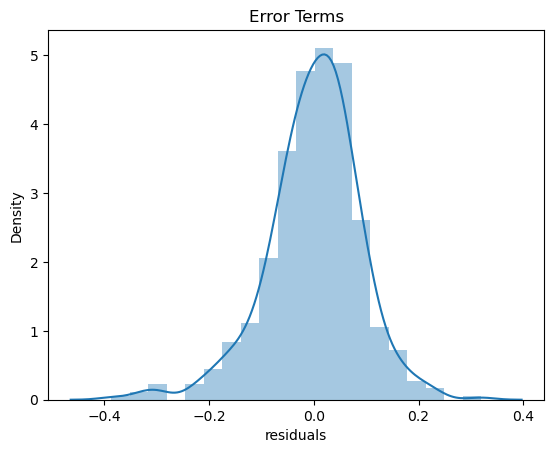

In [58]:
# Predictions on the train set
y_train_pred = lr_model_5.predict(X_train_rfe)
res = (y_train - y_train_pred)

# Plotting the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
plt.xlabel('residuals')
plt.title('Error Terms')
plt.show()



Inference: The residuals are normally distributed, indicating that the model's assumptions are met.

### 6.2 Independent error terms

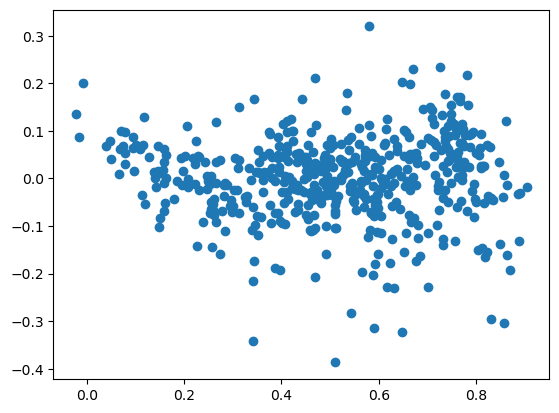

In [59]:
# Plotting scatter plot between "y_train_pred" and "res"
plt.scatter(y_train_pred, res)
plt.show()

It does not seem that error terms follow any pattern.

### 6.3 Homoscedasticity

In [60]:
# Plotting regplot between "y_train_pred" and "y_train"
sns.regplot(y=y_train_pred, x=y_train, line_kws={'color': 'red'})
plt.title('Predicted values Vs. Actual values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

`The above plot shows that the residuals are evenly distributed on both sides of the line, indicating Homoscedasticity. Therefore, this assumption also holds true in this case.`

## Step 7: Model Evaluation 

### 7.1 Test Data Scaling

In [61]:
# Apply minmax scaler transform to test set
# columns_to_scale have been picked from above where scaling was done earlier
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
instant                                                                      
185      0.0      1.0         0.0  0.831783  0.657364   0.084219  0.692706   
536      1.0      0.0         1.0  0.901354  0.610133   0.153728  0.712034   
300      0.0      0.0         0.0  0.511964  0.837699   0.334206  0.303382   
222      0.0      0.0         1.0  0.881625  0.437098   0.339570  0.547400   
153      0.0      0.0         0.0  0.817246  0.314298   0.537414  0.569029   

              day  season_spring  season_summer  ...  mnth_October  \
instant                                          ...                 
185      0.100000            0.0            0.0  ...           0.0   
536      0.633333            0.0            1.0  ...           0.0   
300      0.866667            0.0            0.0  ...           1.0   
222      0.300000            0.0            0.0  ...           0.0   
153      0.033333            0.0            1.0  ...           0.0   

         mnth_September  weathersit_Light Snow  weathersit_Mist  weekday_Mon  \
instant                                                                        
185                 0.0                    0.0              1.0          0.0   
536                 0.0                    0.0              0.0          0.0   
300                 0.0                    0.0              1.0          0.0   
222                 0.0                    0.0              0.0          0.0   
153                 0.0                    0.0              0.0          0.0   

         weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  
instant                                                                   
185              0.0          0.0          0.0          0.0          1.0  
536              0.0          0.0          1.0          0.0          0.0  
300              1.0          0.0          0.0          0.0          0.0  
222              0.0          0.0          0.0          0.0          0.0  
153              1.0          0.0          0.0          0.0          0.0  

[5 rows x 30 columns]

### 7.2 Dividing the test data into X and y sets for evaluation

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
print(y_test.head())
print("*"*25)
print(X_test.head())

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64
*************************
          yr  holiday  workingday      temp       hum  windspeed       day  \
instant                                                                      
185      0.0      1.0         0.0  0.831783  0.657364   0.084219  0.100000   
536      1.0      0.0         1.0  0.901354  0.610133   0.153728  0.633333   
300      0.0      0.0         0.0  0.511964  0.837699   0.334206  0.866667   
222      0.0      0.0         1.0  0.881625  0.437098   0.339570  0.300000   
153      0.0      0.0         0.0  0.817246  0.314298   0.537414  0.033333   

         season_spring  season_summer  season_winter  ...  mnth_October  \
instant                                               ...                 
185                0.0            0.0            0.0  ...           0.0   
536                0.0            1.0            0.0  ...           0.0   
300          

### 7.3 Filtering the test data with features present in the final model    

In [64]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [65]:
test_columns = X_train_rfe.columns[1:] # Removing const
print(test_columns)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')


In [66]:
X_test_new = X_test[test_columns]

In [67]:
# Adding constant
X_test_new = sm.add_constant(X_test_new)

### 7.4 Prediction on test data 

In [68]:
y_test_pred = lr_model_5.predict(X_test_new)

In [69]:
y_test_pred.head()

instant
185    0.390020
536    0.925539
300    0.398297
222    0.605243
153    0.626103
dtype: float64

In [70]:
y_test.head()

instant
185    0.692706
536    0.712034
300    0.303382
222    0.547400
153    0.569029
Name: cnt, dtype: float64

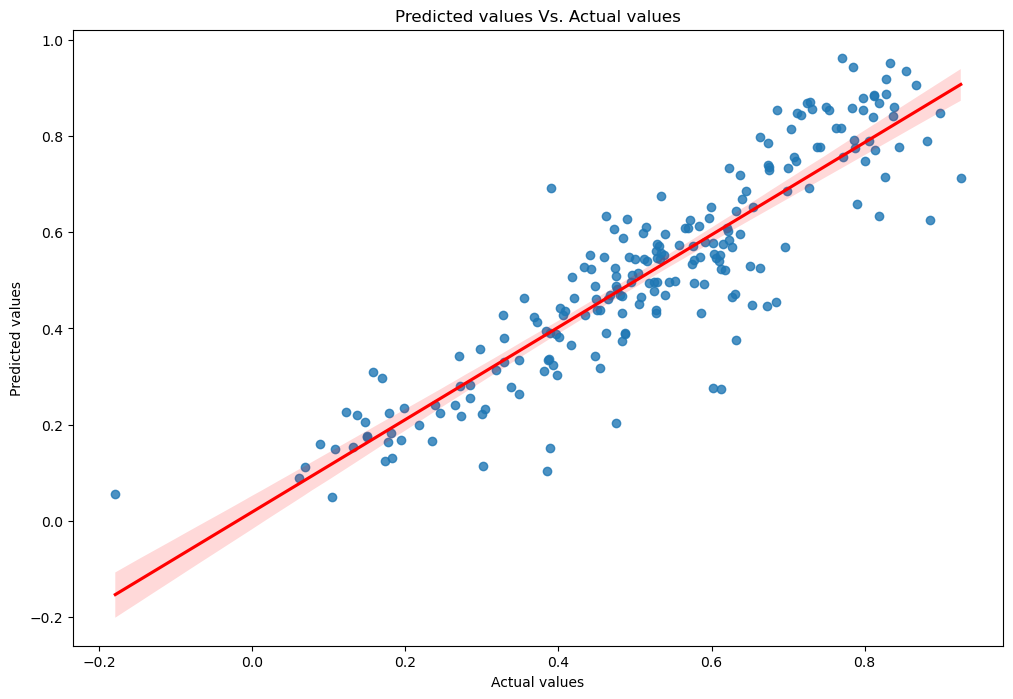

In [71]:
# Plotting a regplot plot between 'y_test' and 'y_test_pred' with line as red
plt.figure(figsize = (12, 8))
sns.regplot(y=y_test, x=y_test_pred, line_kws={'color': 'red'})
plt.title('Predicted values Vs. Actual values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### 7.5 R-Squared value for test data

In [72]:
# Importing 'r2_score' from 'sklearn' library.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
r2


0.8029170032329543

In [73]:
# Calculating adjusted r-squared valur for test set
n=X_test_new.shape[0]
p=X_test_new.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7904190570965075

- R-squared value is 0.80291
- Adjusted R-squared value is 0.7904

In [74]:
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          6.03e-190
Time:                        09:35:59   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2444      0.028      8.658      0.000       0.189       0.300
yr                        0.2289      0.008     28.108      0.000       0.213       0.245
holiday                  -0.0986      0.026     -3.846      0.000      -0.149      -0.048
temp                      0.5717      0.025     22.422      0.000       0.522       0.622
hum                      -0.1764      0.038     -4.672      0.000      -0.251      -0.102
windspeed                -0.1945      0.026     -7.541      0.000      -0.245      -0.144
season_summer             0.0745      0.011      6.728      0.000       0.053       0.096
season_winter             0.1258      0.011     10.986      0.000       0.103       0.148
mnth_January             -0.0380      0.018     -2.164      0.031      -0.073      -0.003
mnth_July                -0.0471      0.018     -2.612      0.009      -0.083      -0.012
mnth_September            0.0941      0.016      5.846      0.000       0.062       0.126
weathersit_Light Snow    -0.2362      0.026     -8.946      0.000      -0.288      -0.184
weathersit_Mist          -0.0519      0.011     -4.938      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.6 Equation of best fitted line for our model

- After seeing the summary the best fitted line eqution for our model is 

``cnt = 0.2444 + 0.2289 * yr - 0.0986 * holiday + 0.5717 * temp - 0.1764 * hum - 0.1945 * windspeed + 0.0745 * season_summer + 0.1258 * season_winter - 0.0380 * mnth_January - 0.0471 * mnth_July + 0.0941 * mnth_September - 0.2362 * weathersit_Light Snow - 0.0519 * weathersit_Mist``